In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import vpython as vs
%matplotlib inline

In [9]:
train = pd.read_csv('train.csv')
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
test = pd.read_csv('test.csv')
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


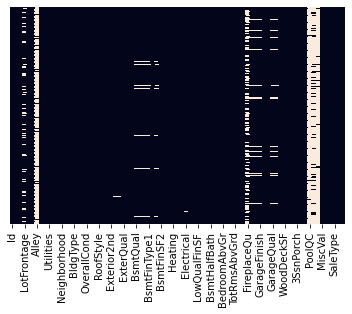

In [11]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [12]:
combined = pd.concat((train, test)).reset_index(drop=True)
prices = train['SalePrice']
combined.drop(['SalePrice'], axis=1, inplace=True)
combined.shape

(2919, 80)

In [13]:
minimum_price = np.amin(prices)
maximum_price = np.amax(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print('Statistics for housing prices dataset:\n')
print('Minimum price: ${}'.format(minimum_price))
print('Maximum price: ${}'.format(maximum_price))
print('Mean price: ${}'.format(mean_price))
print('Median price: ${}'.format(median_price))
print('Standard deviation of prices: ${}'.format(std_price))

Statistics for housing prices dataset:

Minimum price: $34900
Maximum price: $755000
Mean price: $180921.19589041095
Median price: $163000.0
Standard deviation of prices: $79415.29188606751


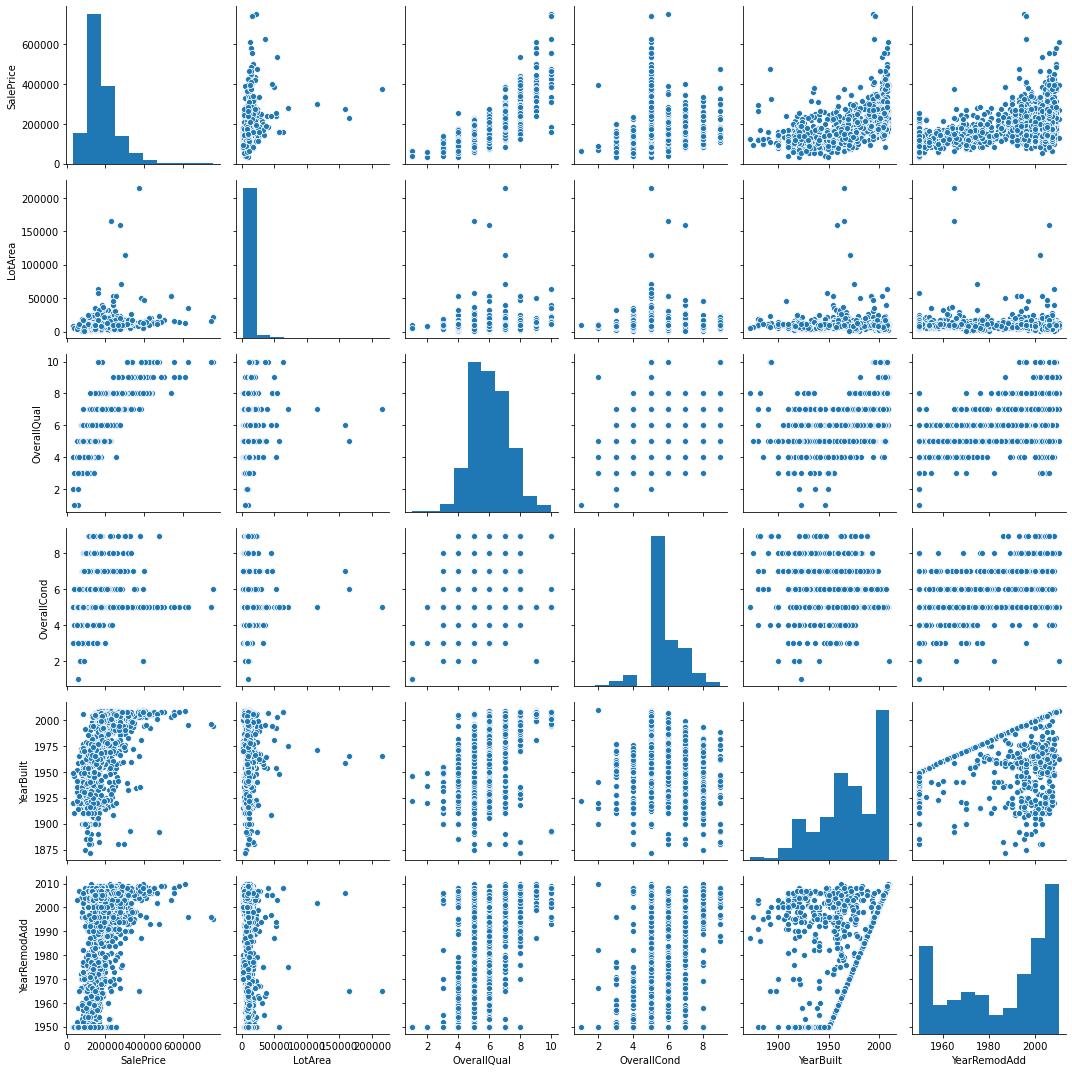

In [16]:
# features of interest: MSSubClass (building class), 
# LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd
# plt.scatter(data['SalePrice'], data['MSSubClass'])
test = pd.DataFrame()
test['SalePrice'] = prices
# test['MSSubClass'] = data['MSSubClass']
# test['LotFrontage'] = data['LotFrontage']
test['LotArea'] = combined['LotArea']
test['OverallQual'] = combined['OverallQual']
test['OverallCond'] = combined['OverallCond']
test['YearBuilt'] = combined['YearBuilt']
test['YearRemodAdd'] = combined['YearRemodAdd']
sns.pairplot(test, height=2.5)
plt.tight_layout()

In [17]:
# def performance_metric(y_true, y_predict):
#     score = r2_score(y_true, y_predict)
#     return score

In [18]:
x = combined.isnull().sum().sort_values(ascending=False)
print(x[x>0])
print(combined.head())

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
Exterior2nd        1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   

In [20]:
#missing LotFrontage, MasVnrArea, GarageYrBlt
combined['LotFrontage'] = combined['LotFrontage'].fillna(combined['LotFrontage'].median()) 
combined["MasVnrType"] = combined["MasVnrType"].fillna("None")
combined["MasVnrArea"] = combined["MasVnrArea"].fillna(0)
print(combined.shape)
col = list(combined)
for i in col:
    if combined[i].count() < 2919:
        if combined[i].dtype.name == 'object':
#             combined[i] = combined.fillna(combined[i].value_counts().index[0])
            combined[i] = combined[i].fillna("NA")
        else:
            combined[i] = combined[i].fillna(combined[i].mode()[0])

(2919, 80)


In [21]:
print(combined.count())
print(combined.shape)
cols = combined.columns
num_cols = combined._get_numeric_data().columns
categories = list(set(cols)-set(num_cols))

Id               2919
MSSubClass       2919
MSZoning         2919
LotFrontage      2919
LotArea          2919
                 ... 
MiscVal          2919
MoSold           2919
YrSold           2919
SaleType         2919
SaleCondition    2919
Length: 80, dtype: int64
(2919, 80)


In [22]:
def process_features(categories):
    global combined
    for i in range(len(categories)):
        dummy = pd.get_dummies(combined[categories[i]], prefix=categories[i])
        combined = pd.concat([combined, dummy], axis=1)
        combined.drop(categories[i], axis=1, inplace=True)
    return combined
    
print(len(categories))
combined = process_features(categories)
combined.head()

43


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Street_Pave,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,Utilities_AllPub,Utilities_NA,Utilities_NoSeWa
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,1,0,0,0,1,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,1,0,0,0,0,0,1,1,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,1,0,0,0,0,0,1,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,1,0,0,1,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,1,0,0,0,0,0,1,1,0,0


In [23]:
train = combined.iloc[:1460,:]
test = combined.iloc[1460:,:]
X_train = train
y_train = prices
X_test = test
# X_train, X_test, y_train, y_test = train_test_split(train, targets, test_size=0.33, random_state=42)

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn import svm
from sklearn.metrics import make_scorer, r2_score, mean_squared_log_error
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import plot_importance
cv = KFold(n_splits = 5, shuffle=True, random_state=42).get_n_splits(X_train.values)

def test_model(model):
    msle = make_scorer(mean_squared_log_error)
    rsme = np.sqrt(cross_val_score(model, X_train, y_train, cv=cv, scoring = msle))
    score_rsme = [rsme.mean()]
    return score_rsme

def test_model_r2(model):
    r2 = make_scorer(r2_score)
    r2_error = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score_r2 = [r2_error.mean()]
    return score_r2

In [25]:
# clf_linearReg = LinearRegression()
# rmse_linearReg = test_model(clf_linearReg)
# print(rmse_linearReg)

In [26]:
# clf_lasso = Lasso(alpha=0.0001)
# rmse_lasso = test_model(clf_lasso)
# print(rmse_lasso)

clf_ridge = Ridge(alpha = 10, copy_X=True, 
                  fit_intercept=True, max_iter=None, normalize=False,
                 random_state=None, solver='auto', tol=0.001)
rsme_ridge = test_model(clf_ridge)
print(rsme_ridge, test_model_r2(clf_ridge))

[0.15458123838468524] [0.8383934464063705]


In [27]:
# clf_elastic_net = ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, 
#                             l1_ratio=0.9, max_iter=100, normalize=False, positive=False, 
#                              precompute=False, random_state=None, selection='cyclic', 
#                              tol=0.0001, warm_start=False)
# rsme_elastic_net = test_model(clf_elastic_net)
# print(rsme_elastic_net, test_model_r2(clf_elastic_net))

In [28]:
clf_svm = svm.SVC()
rsme_svm = test_model(clf_svm)
print(rsme_svm, test_model_r2(clf_svm))

c:\users\nikki\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\nikki\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.42637675533979513] [-0.21303539535184296]


In [29]:
clf_decision_tree = DecisionTreeRegressor(max_depth=5, random_state=51)
rsme_decision_tree = test_model(clf_decision_tree)
print(rsme_decision_tree, test_model_r2(clf_decision_tree))

[0.20252953735343318] [0.7330717879372097]


In [30]:
clf_random_forest = RandomForestRegressor(max_depth=5, random_state=51)
rsme_random_forest = test_model(clf_random_forest)
print(rsme_random_forest, test_model_r2(clf_random_forest))

[0.17288986151055388] [0.8226874022103843]


In [31]:
clf_adaboost = AdaBoostRegressor(random_state=51, n_estimators=1000)
rsme_adaboost = test_model(clf_adaboost)
print(rsme_adaboost, test_model_r2(clf_adaboost))

[0.20928665953753384] [0.7874388351936705]


In [32]:
clf_bagging = BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                              max_features=1.0, max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
                              random_state=51, verbose=0, warm_start=False)
rsme_bagging = test_model(clf_bagging)
print(rsme_bagging, test_model_r2(clf_bagging))

[0.14736210588061716] [0.8534771857004513]


In [33]:
clf_xgb = xgb.XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1, colsample_bynode=1,
                          colsample_bytree=0.5, gamma=0.1, gpu_id=-1, important_type='gain',
                          interaction_constraints=None, learning_rate=0.1, max_delta_step=0, max_depth=10,
                          min_child_weight=7, missing=None, monotone_constraints=None, n_estimators=100, n_jobs=0, 
                           num_parallel_tree=1, objective='reg:squarederror', random_state=0, reg_alpha=0,
                          reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None, validate_parameters=False,
                          verbosity=None)
rsme_xgb = test_model(clf_xgb)
print(rsme_xgb, test_model_r2(clf_xgb))

[0.13534287988649663] [0.8683681179770127]


In [34]:
clf_gradient = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                                        init=None,learning_rate=0.15, loss='ls', max_depth=3, max_features=None, 
                                        max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=60, min_weight_fraction_leaf=0.0, n_estimators=1500,
                                        n_iter_no_change=None, presort='deprecated', random_state=None, subsample=1, tol=0.0001,
                                        validation_fraction=0.1, verbose=0, warm_start=False)
rsme_gradient = test_model(clf_gradient)
print(rsme_gradient, test_model_r2(clf_gradient))

[0.1386820808150448] [0.8893523709370182]


In [35]:
clf_xgb.fit(X_train, y_train)
Y_pred = clf_xgb.predict(test)

In [36]:
# def fit_model(X, y):
#     cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
#     regressor = DecisionTreeRegressor()
#     params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
#     scoring_fnc = make_scorer(performance_metric)
#     grid = a(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
#     grid = grid.fit(X, y)
#     return grid.best_estimator_

In [37]:
# reg = fit_model(X_train, y_train)
# reg = fit_model(train, targets)
# print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

In [38]:
print(test.shape)
# output = reg.predict(test) 
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
# print(aux.head())
df_output['Id'] = aux['Id']
df_output['SalePrice'] = Y_pred
df_output[['Id', 'SalePrice']].to_csv('TestSalePrice.csv', index=False)

(1459, 311)
